<center><h1> Uvod u podatkovnu znanost  </h1></center>
<center><h2> Zimski semestar - 2022 </h2></center> 
<center><h3> Lab 6</h3></center> 
<center><h3> </h3></center> 
<center><h3> Statistička analiza podataka</h3></center> 

## Podaci

Koristit ćete skup podataka od 18403 glazbene recenzije izvučene iz Pitchfork baze, uključujući relevantne metapodatke kao što su autor recenzije, datum recenzije, godina izdanja ploče, rezultat recenzije i žanr, zajedno sa audio značajkama dotičnog albuma preuzetim iz Spotifyjevog API-ja. Podaci se sastoje od sljedećih stupaca:

| Stupac   | Opis  |
|----------|:-------------|
| `artist`           | Ime izvođača koji je stvorio album koji se pregledava. |
| `album`            | Naziv albuma koji se pregledava. |
| `recordlabel`      | Ime diskografske kuće koja je objavila album. |
| `releaseyear`      | Godina izlaska albuma. |
| `score`            | Ocjena koju je recenzent dao albumu na ljestvici od 0,0 do 10,0. |
| `reviewauthor`     | Ime autora koji je recenzirao album. |
| `genre`            | Žanr koji je albumu dodijelio Pitchfork. |
| `reviewdate`       | Datum objave recenzije.  |
| `key` | Procijenjeni ukupni glazbeni ključ pjesme. |
| `acousticness` | Mjera pouzdanosti od 0,0 do 1,0 je li album akustičan. |
| `danceability` | Koliko je album prikladan za ples na temelju kombinacije glazbenih elemenata uključujući tempo, stabilnost ritma, snagu takta i ukupnu pravilnost.
| `energy` | Percepcijska mjera intenziteta i aktivnosti. |
| `instrumentalness` | Predviđa sadrži li album vokale, od 0,0 do 1,0. |
| `liveness` | Detektira prisutnost publike, od 0,0 do 1,0. |
| `loudness` | Ukupna glasnoća albuma u decibelima (dB). |
| `speechiness` | Mjeri prisutnost izgovorenih riječi u albumu na skali od 0,0 do 1,0. |
| `valence` | Mjera od 0,0 do 1,0 koja opisuje glazbenu pozitivnost koju prenosi album. |
| `tempo` | Ukupni procijenjeni tempo albuma u otkucajima u minuti (BPM). |


In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

import seaborn as sns
import numpy as np
import scipy
import itertools

# datetime operations
from datetime import datetime

# ttest and euclidean distance
from scipy.stats import ttest_ind

sns.set_style('whitegrid')

## Vježba 1: Inicijalna analiza?


**Task 1 (Inicijalna analiza)**

Kao dobar podatkovni znanstvenik, prvo što morate učiniti je dobro pogledati podatke koji su vam uručeni.

1. Učitajte podatke pomoću `pandas`. Identificirajte i uklonite duple recenzije, tj. dvije recenzije s albumima istog benda s istim imenom (zadržite prvo pojavljivanje). Ispišite broj redaka u vašem podatkovnom okviru.

2. Nacrtajte distribuciju godina izdavanja albuma i prosječnu ocjenu albuma po godini.

3. Za numeričke stupce izračunajte srednju vrijednost, medijan, minimalnu vrijednost i maksimalnu vrijednost. Osim toga, iscrtajte distribuciju za sve numeričke stupce na jednoj slici (po mogućnosti s višestrukim podcrtama). Vaša bi slika trebala biti najviše 14 inča široka i 14 inča dugačka.

3. Za kategoričke stupce navedite koliko različitih vrijednosti postoji u svakom stupcu. Ako postoji manje od 10 različitih vrijednosti za kategoriju, ispišite ih sve. Za stupac `genre` dodijelite vrijednost `'Other'` za albume gdje je vrijednost ili `'none'` ili `NaN`.

---

In [5]:
# 1.1

pitchfork = pd.read_csv('pitchfork.csv')
pitchfork = pitchfork.drop_duplicates(subset=["album", "artist"], keep="first")
print("Num. rows: " + str(len(pitchfork)))
pitchfork.head()

Num. rows: 16738


,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308


In [6]:
numeric_cols = ['score', 'releaseyear', 'danceability', 'energy', 'key',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']
for i in numeric_cols:
    pitchfork = pitchfork.loc[pitchfork[i] != -1].copy(deep=True)


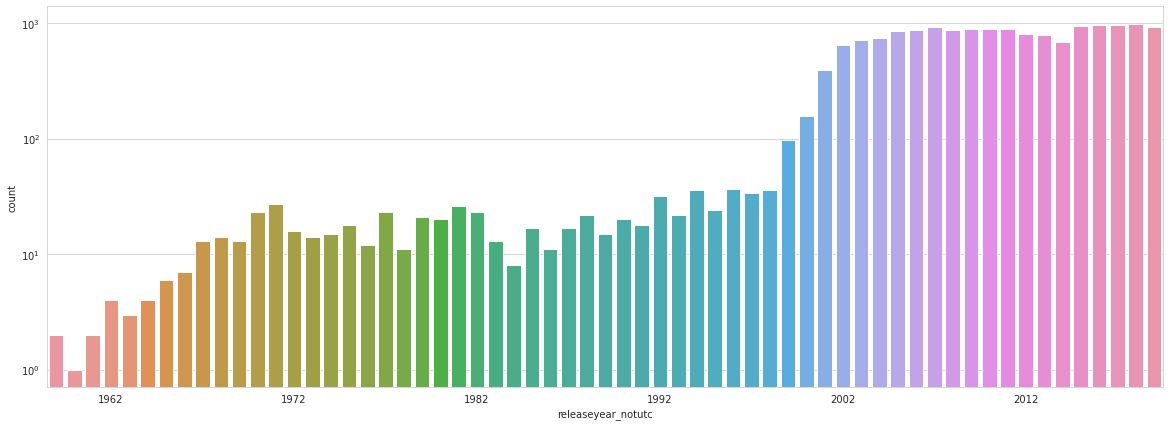

In [25]:
# 1.2

pitchfork['reviewdate'] = pd.to_datetime(pitchfork['reviewdate'], format='%B %d %Y')
pitchfork['releaseyear'] = pd.to_datetime(pitchfork['releaseyear'], format='%Y')
pitchfork['releaseyear_notutc'] = pitchfork.releaseyear.dt.year

# HINT: sns.countplot
plt.figure(figsize=(20,7))
ax=sns.countplot(data=pitchfork, x="releaseyear_notutc")
ax.set_yscale("log")
ax.set_xticks([3,13,23,33,43,53])
plt.show()
# HINT: sns.barplot


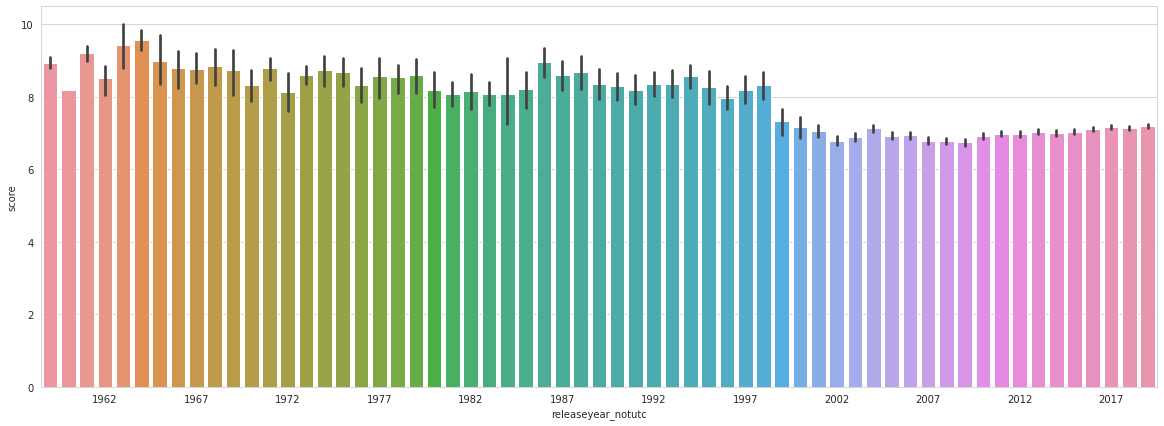

In [33]:
plt.figure(figsize=(20,7))
ax=sns.barplot(data=pitchfork, x="releaseyear_notutc",y="score")
#ax.set_yscale("log")
ax.set_xticks([3,8,13,18,23,28,33,38,43,48,53,58])
plt.show()

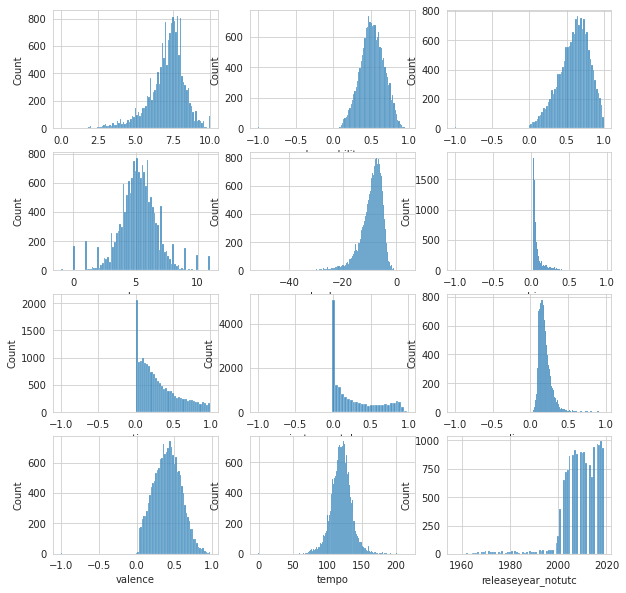

,count,mean,std,min,25%,50%,75%,max
score,16738.0,7.048596,1.247027,0.00000,6.500000,7.300000,7.800000,10.000
danceability,16738.0,0.512334,0.158859,-1.00000,0.408900,0.511348,0.622625,0.974
energy,16738.0,0.601276,0.203196,-1.00000,0.474000,0.624722,0.749714,0.999
key,16738.0,5.216501,1.613841,-1.00000,4.333333,5.230769,6.100000,11.000
loudness,16738.0,-9.283268,4.238371,-51.72875,-11.217535,-8.444263,-6.392496,4.078
speechiness,16738.0,0.090742,0.090126,-1.00000,0.040633,0.056665,0.100211,0.958
acousticness,16738.0,0.301914,0.262392,-1.00000,0.091104,0.228844,0.460500,0.996
instrumentalness,16738.0,0.274748,0.298907,-1.00000,0.009597,0.149363,0.497283,0.982
liveness,16738.0,0.196402,0.104933,-1.00000,0.134517,0.174261,0.228338,0.978
valence,16738.0,0.405268,0.182293,-1.00000,0.274267,0.406288,0.531720,0.971


In [37]:
# 1.3

numeric_cols = pitchfork.select_dtypes(include=['int64','float64']).columns
# CODE GOES HERE
fig, axes= plt.subplots(4,3, figsize=(10,10))

for i, ax in zip(enumerate(numeric_cols), axes.flat):
    sns.histplot(ax=ax,data=pitchfork[i[1]])
plt.show()

pitchfork.describe().T

In [9]:
# 1.4 



## Vježba 2: Sindrom drugog albuma

**Task 2 (Preliminarna analiza)**

Počinjete provođenjem neke preliminarne obrade podataka i analiza.

1. Napravite novi dataframe (od izvornih podataka s izbačenim duplikatima, isti kao što ste dobili nakon završetka zadatka 1.1) koji sadrži samo albume izvođača s dva ili više albuma i gdje godina izdanja nije prazna.
2. Napravite novi stupac `album_number` koji označava koliko je albuma izvođač producirao prije ovog (prije drugog albuma, izvođač je već producirao jedan album).
3. Izračunajte srednju vrijednost i standardnu pogrešku za srednju vrijednost rezultata prvog i drugog albuma u skupu podataka. Dodatno, nacrtajte dvije distribucije.
4. Koristite odgovarajuću metodu da odredite je li razlika u sredinama 1. i 2. albuma statistički signigikantna?
5. **Diskutirajte:** Sugeriraju li ove analize postojanje "sindroma drugog albuma"?

---

In [34]:
# 5.1

pitchfork = pd.read_csv('pitchfork.csv')
pitchfork = pitchfork.drop_duplicates(subset=["album", "artist"], keep="first")
pitchfork['reviewdate'] = pd.to_datetime(pitchfork['reviewdate'], format='%B %d %Y')
pitchfork['releaseyear'] = pd.to_datetime(pitchfork['releaseyear'], format='%Y')
pitchfork['releaseyear_notutc'] = pitchfork.releaseyear.dt.year

filtered_artists = pitchfork.groupby('artist').size().loc[lambda x : x > 1].index

two_ormore = pitchfork[pitchfork.artist.isin(filtered_artists)].copy()

In [11]:
# 5.2

# adding album number


In [12]:
# 5.3


In [13]:
# 5.4
